<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#visualkeras-official-example" data-toc-modified-id="visualkeras-official-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>visualkeras official example</a></span></li></ul></div>

In [1]:
from keras.models import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

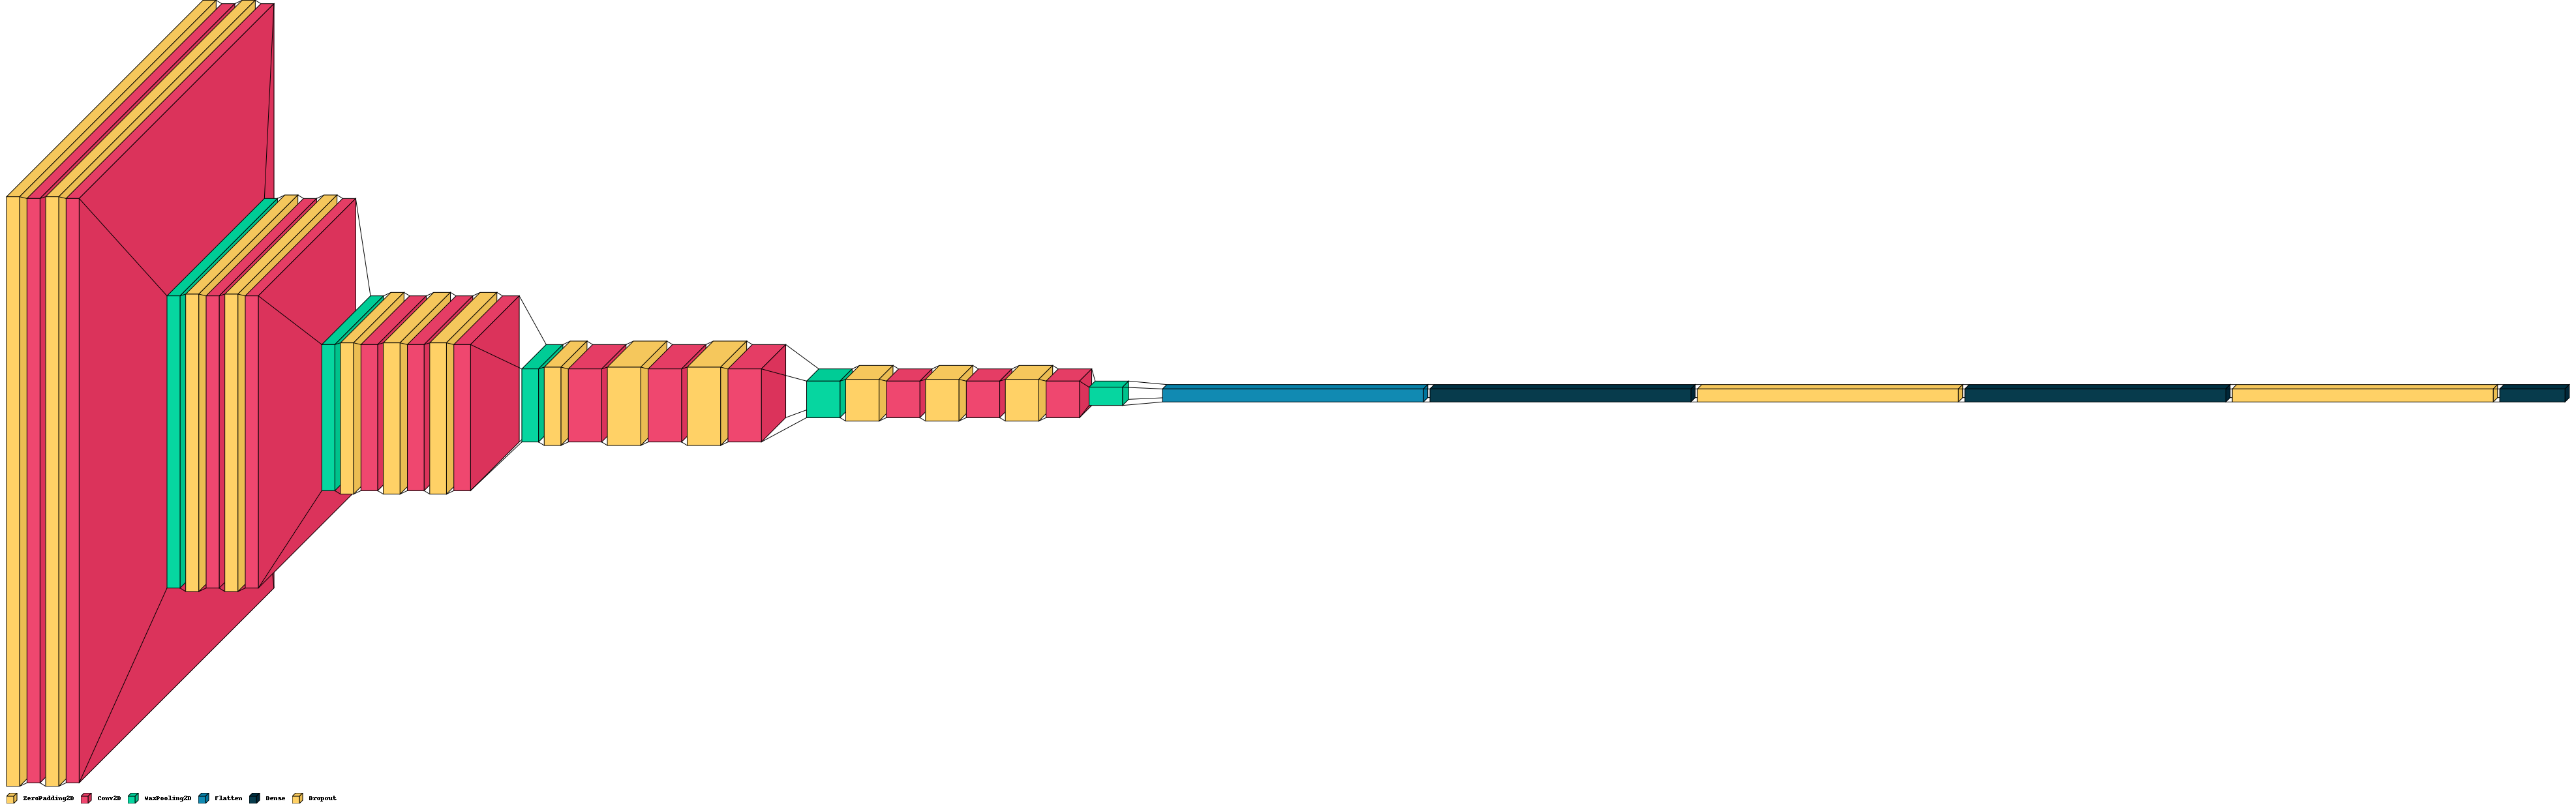

In [11]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png',legend=True) # write to disk
# visualkeras.layered_view(model, to_file='output.png').show() # write and show

# visualkeras official example

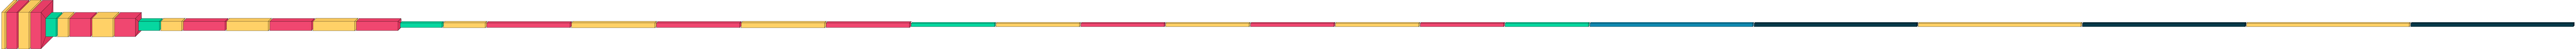

In [9]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, InputLayer, ZeroPadding2D
from collections import defaultdict
import visualkeras
from PIL import ImageFont

# create VGG16
image_size = 224
model = Sequential()
model.add(InputLayer(input_shape=(image_size, image_size, 3)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3)))
model.add(visualkeras.SpacingDummyLayer())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, activation='relu', kernel_size=(3, 3)))
model.add(visualkeras.SpacingDummyLayer())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, activation='relu', kernel_size=(3, 3)))
model.add(visualkeras.SpacingDummyLayer())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(visualkeras.SpacingDummyLayer())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, activation='relu', kernel_size=(3, 3)))
model.add(MaxPooling2D())
model.add(visualkeras.SpacingDummyLayer())

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

# Now visualize the model!

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

# font = ImageFont.truetype("arial.ttf", 32)

visualkeras.layered_view(model, to_file='images/vgg16.png', type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='images/vgg16_legend.png', type_ignore=[visualkeras.SpacingDummyLayer],
                         legend=True
#                          , font=font
                        )
visualkeras.layered_view(model, to_file='images/vgg16_spacing_layers.png', spacing=0)
visualkeras.layered_view(model, to_file='images/vgg16_type_ignore.png',
                         type_ignore=[ZeroPadding2D, Dropout, Flatten, visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='images/vgg16_color_map.png',
                         color_map=color_map, type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='images/vgg16_flat.png',
                         draw_volume=False, type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='images/vgg16_scaling.png',
                         scale_xy=1, scale_z=1, max_z=1000, type_ignore=[visualkeras.SpacingDummyLayer])